# Load Model

In [6]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [7]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Adibah Syasya/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-10 Python-3.12.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# Make Initial Detection

In [6]:
img = "C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/peoplecat.jpg"

In [8]:
result = model(img)
result.print()

C:\Users\Adibah Syasya/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 1167x1600 2 persons, 1 cat
Speed: 161.2ms pre-process, 82.5ms inference, 56.7ms NMS per image at shape (1, 3, 480, 640)


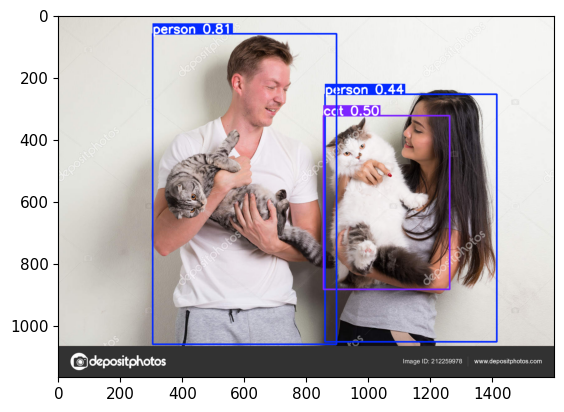

In [10]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

In [12]:
# xmin, ymin, xmax, ymax, confidence_score, class
result.xyxy

[tensor([[3.05088e+02, 6.01127e+01, 8.98290e+02, 1.06135e+03, 8.09277e-01, 0.00000e+00],
         [8.56860e+02, 3.24486e+02, 1.26386e+03, 8.84777e+02, 4.98893e-01, 1.50000e+01],
         [8.61597e+02, 2.55240e+02, 1.41559e+03, 1.05337e+03, 4.35417e-01, 0.00000e+00]], device='cuda:0')]

## Testing real-time object detection

In [111]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    result = model(frame)
    cv2.imshow('YOLO', np.squeeze(result.render()))
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


# Prepare Dataset

In [80]:
import os
import shutil

In [82]:
test_path = "dataset/yolo-animal-detection-small/label/test"
train_path = "dataset/yolo-animal-detection-small/label/train"

des_label_test = "data/labels/test"
des_label_train = "data/labels/train"

### 1.1 Seperating Png file from its corresponding xml file in a folder

In [90]:
for file in os.listdir(train_path):
    if file.endswith('.xml'):
        source_path = os.path.join(train_path, file)
        des_path = os.path.join(des_label_train, file)
        shutil.move(source_path, des_path)
        print(f"Moved {file} to {des_path}")
print("All XML files have been seperated successfully")

Moved cats_001.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_001.xml
Moved cats_002.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_002.xml
Moved cats_003.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_003.xml
Moved cats_004.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_004.xml
Moved cats_005.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_005.xml
Moved cats_006.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_006.xml
Moved cats_008.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_008.xml
Moved cats_009.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/train\cats_009.xml
Moved cats_010.x

In [88]:
for file in os.listdir(test_path):
    if file.endswith('.xml'):
        source_path = os.path.join(test_path, file)
        des_path = os.path.join(des_label_test, file)
        shutil.move(source_path, des_path)
        print(f"Moved {file} to {des_path}")
print("All XML files have been seperated successfully")

Moved cats_000.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_000.xml
Moved cats_007.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_007.xml
Moved cats_050.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_050.xml
Moved cats_072.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_072.xml
Moved cats_076.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_076.xml
Moved cats_079.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_079.xml
Moved cats_088.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_088.xml
Moved cats_091.xml to C:/Users/Public/Youtube/Nicholas/Yolov5_MonkeyDogDetection/Working_dataset/labels/test\cats_091.xml
Moved cats_099.xml to C:

### 1.2 Converting xml files to YOLO format

In [118]:
import os
import xml.etree.ElementTree as ET

def convert_to_yolo(size, box):
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0 - 1
    y = (box[2] + box[3]) / 2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def convert_xml_to_yolo(xml_file, txt_file, classes):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    size = root.find("size")
    w = int(size.find("width").text)
    h = int(size.find("height").text)

    with open(txt_file, "w") as txt:
        for obj in root.iter("object"):
            cls = obj.find("name").text
            if cls not in classes:
                continue
            cls_id = classes.index(cls)
            xmlbox = obj.find("bndbox")
            b = (float(xmlbox.find("xmin").text), float(xmlbox.find("xmax").text),
                 float(xmlbox.find("ymin").text), float(xmlbox.find("ymax").text))
            bb = convert_to_yolo((w, h), b)
            txt.write(f"{cls_id} " + " ".join(f"{a:.6f}" for a in bb) + "\n")

In [120]:
input_folder = "dataset/yolo-animal-detection-small/label/test"
output_folder = "data/labels/test"
classes = ["dog", "monkey", "cat"]  # Replace with your class names

os.makedirs(output_folder, exist_ok=True)

for file in os.listdir(input_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(input_folder, file)
        txt_path = os.path.join(output_folder, file.replace(".xml", ".txt"))
        convert_xml_to_yolo(xml_path, txt_path, classes)

In [122]:
input_folder = "dataset/yolo-animal-detection-small/label/train"
output_folder = "data/labels/train"
classes = ["dog", "monkey", "cat"]  # Replace with your class names

os.makedirs(output_folder, exist_ok=True)

for file in os.listdir(input_folder):
    if file.endswith(".xml"):
        xml_path = os.path.join(input_folder, file)
        txt_path = os.path.join(output_folder, file.replace(".xml", ".txt"))
        convert_xml_to_yolo(xml_path, txt_path, classes)

# Training Model

In [14]:
!cd yolov5 && python train.py --img 320 --epochs 400 --data dataset.yaml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=400, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data\hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-389-ge62a31b6 Python-3.12.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, c

# Evaluation

In [20]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/best.pt')

Using cache found in C:\Users\Adibah Syasya/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-12-10 Python-3.12.4 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [34]:
img2 = "test_monkey.jpg"

In [36]:
result2 = model(img2)
result2.print()

C:\Users\Adibah Syasya/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 183x275 1 monkey
Speed: 20.2ms pre-process, 32.0ms inference, 4.0ms NMS per image at shape (1, 3, 448, 640)


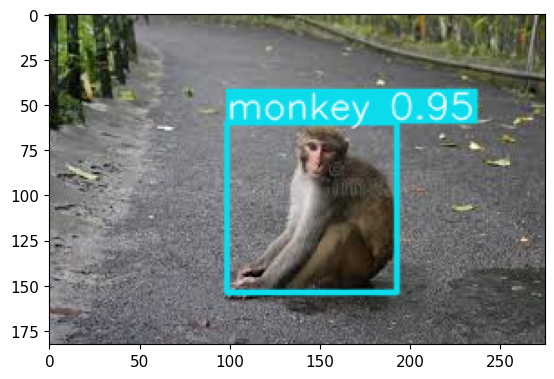

In [38]:
%matplotlib inline
plt.imshow(np.squeeze(result2.render()))